# Prophet 實作

## 載入相關套件

In [127]:
import os
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
from prophet import Prophet

## 載入資料集

In [128]:
df = pd.read_csv('../nlp_data/airline-passengers.csv')
df

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


## 資料轉換

In [129]:
# 設定為日期的資料型態
df['Date'] = pd.to_datetime(df['Month'])

# 設定日期為 DataFrame 的索引值
df = df.set_index('Date')

# 依照資料內容設定日期的頻率
df.index = pd.DatetimeIndex(df.index.values,
                               freq=df.index.inferred_freq)
# 將原有欄位刪除
df.drop('Month', axis=1, inplace=True)

## 繪圖

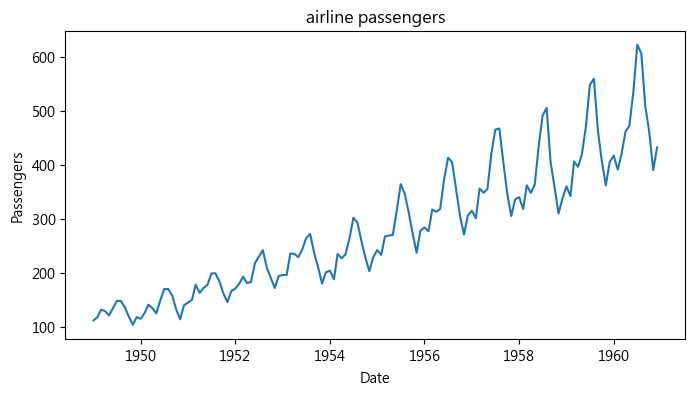

In [130]:
plt.figure(figsize=(8, 4))
sns.lineplot(x=df.index, y='Passengers', data=df)
plt.xlabel('Date')
plt.title('airline passengers');

## 資料分割

In [131]:
from sklearn.model_selection import train_test_split

# 欄位改名
df = df.reset_index()
df.columns = ['ds', 'y'] 

# 資料分割
test_size=12
X_train, X_test = train_test_split(df, test_size=test_size, shuffle=False)

# 查看陣列維度
X_train.shape, X_test.shape

((132, 2), (12, 2))

In [132]:
X_train

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
127,1959-08-01,559
128,1959-09-01,463
129,1959-10-01,407
130,1959-11-01,362


## 模型訓練

In [133]:
m = Prophet()
m.fit(X_train)

13:11:17 - cmdstanpy - INFO - Chain [1] start processing
13:11:17 - cmdstanpy - INFO - Chain [1] done processing


## 模型預測

In [144]:
future = m.make_future_dataframe(periods=12, freq = 'MS')
predict = m.predict(future)
predict.tail(12)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
132,1960-01-01,447.180136,398.441960,451.265865,447.180136,447.180136,-22.322280,-22.322280,-22.322280,-22.322280,-22.322280,-22.322280,0.0,0.0,0.0,424.857856
133,1960-02-01,450.198608,395.649447,448.076717,450.181767,450.215624,-28.732434,-28.732434,-28.732434,-28.732434,-28.732434,-28.732434,0.0,0.0,0.0,421.466174
134,1960-03-01,453.022340,431.371650,482.440652,452.982177,453.058669,3.983726,3.983726,3.983726,3.983726,3.983726,3.983726,0.0,0.0,0.0,457.006066
135,1960-04-01,456.040812,426.534810,475.835008,455.968879,456.108141,-4.682565,-4.682565,-4.682565,-4.682565,-4.682565,-4.682565,0.0,0.0,0.0,451.358247
136,1960-05-01,458.961913,429.751923,478.649586,458.849668,459.069005,-5.078964,-5.078964,-5.078964,-5.078964,-5.078964,-5.078964,0.0,0.0,0.0,453.882950
137,1960-06-01,461.980385,468.427036,517.565391,461.826514,462.131496,31.733756,31.733756,31.733756,31.733756,31.733756,31.733756,0.0,0.0,0.0,493.714142
138,1960-07-01,464.901487,498.098147,550.239707,464.696367,465.101277,58.936697,58.936697,58.936697,58.936697,58.936697,58.936697,0.0,0.0,0.0,523.838184
139,1960-08-01,467.919959,501.622301,553.324977,467.666003,468.174355,59.363904,59.363904,59.363904,59.363904,59.363904,59.363904,0.0,0.0,0.0,527.283863
140,1960-09-01,470.938431,460.121784,513.418384,470.619012,471.246193,15.094952,15.094952,15.094952,15.094952,15.094952,15.094952,0.0,0.0,0.0,486.033383
141,1960-10-01,473.859533,425.680601,479.308727,473.472672,474.225343,-21.475291,-21.475291,-21.475291,-21.475291,-21.475291,-21.475291,0.0,0.0,0.0,452.384241


## 繪圖

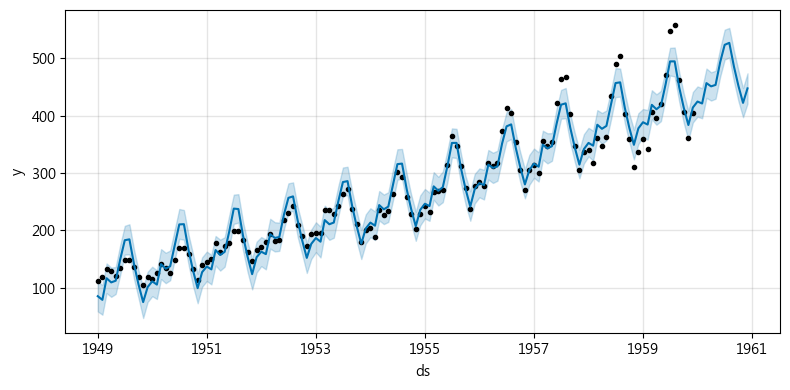

In [145]:
fig1 = m.plot(predict, figsize=(8, 4))

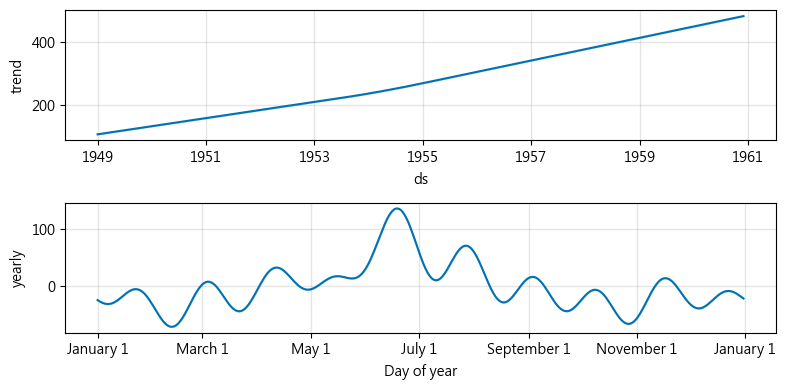

In [148]:
fig2 = m.plot_components(predict, figsize=(8, 4))

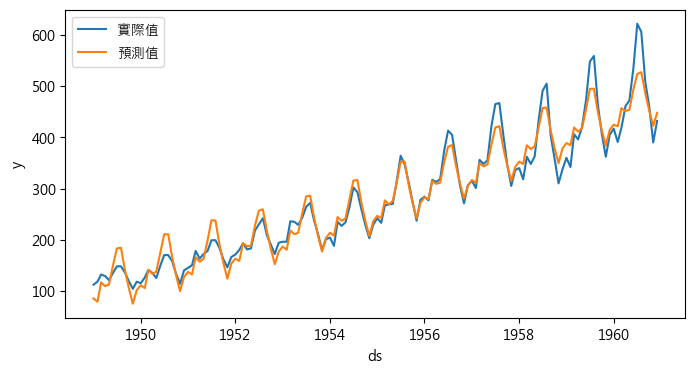

In [150]:
# 修正中文亂碼 
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] # 微軟正黑體
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(8,4))
df['predict'] = predict['yhat'].values
sns.lineplot(data=df, x='ds', y='y', label='實際值')
sns.lineplot(data=df, x='ds', y='predict', label='預測值')
plt.legend();

## 計算MSE

In [137]:
df['residual'] = df['y'] - df['predict']
print(f'MSE = {(np.sum(df['residual']**2) / len(df['residual'])):.2f}')

MSE = 529.32
